# SuperAI Season 4 - Level Individual Hackathon - Sleep Stages Classification

In [ ]:
%pwd
%cd ../workspaces/Sleep_Stages_Classification

/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/workspaces/Sleep_Stages_Classification


## Data Exploration

In [ ]:
!unzip -q /content/sleep-stage-classification-spai5.zip

### Sample

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [ ]:
sample_train = pd.read_csv('/content/train/train/train050.csv')

In [ ]:
sample_train

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,21.435158,33.660299,36.535068,36.458565,35.795361,0.119022,73.617479,0.899221,W
1,0.564903,32.552818,36.860927,38.108725,35.795741,0.119029,73.617635,0.892861,W
2,-7.669907,32.740969,36.521867,37.614980,35.795142,0.119010,73.617426,0.899103,W
3,-27.282107,33.760972,36.569215,36.907092,35.795785,0.119037,73.617608,0.894472,W
4,-25.232409,32.754062,36.649056,37.539971,35.795192,0.119001,73.617471,0.814339,W
...,...,...,...,...,...,...,...,...,...
197035,137.757507,22.771712,-41.536870,34.092158,34.965348,0.067132,70.259340,0.772350,N
197036,120.681772,19.705198,-39.501244,39.926869,34.965577,0.066425,70.258487,0.772248,N
197037,77.589247,35.910886,-39.366102,38.274356,34.964596,0.065732,70.254073,0.772361,N
197038,16.048356,37.987763,-40.444889,32.963732,34.965787,0.065873,70.260711,0.772276,N


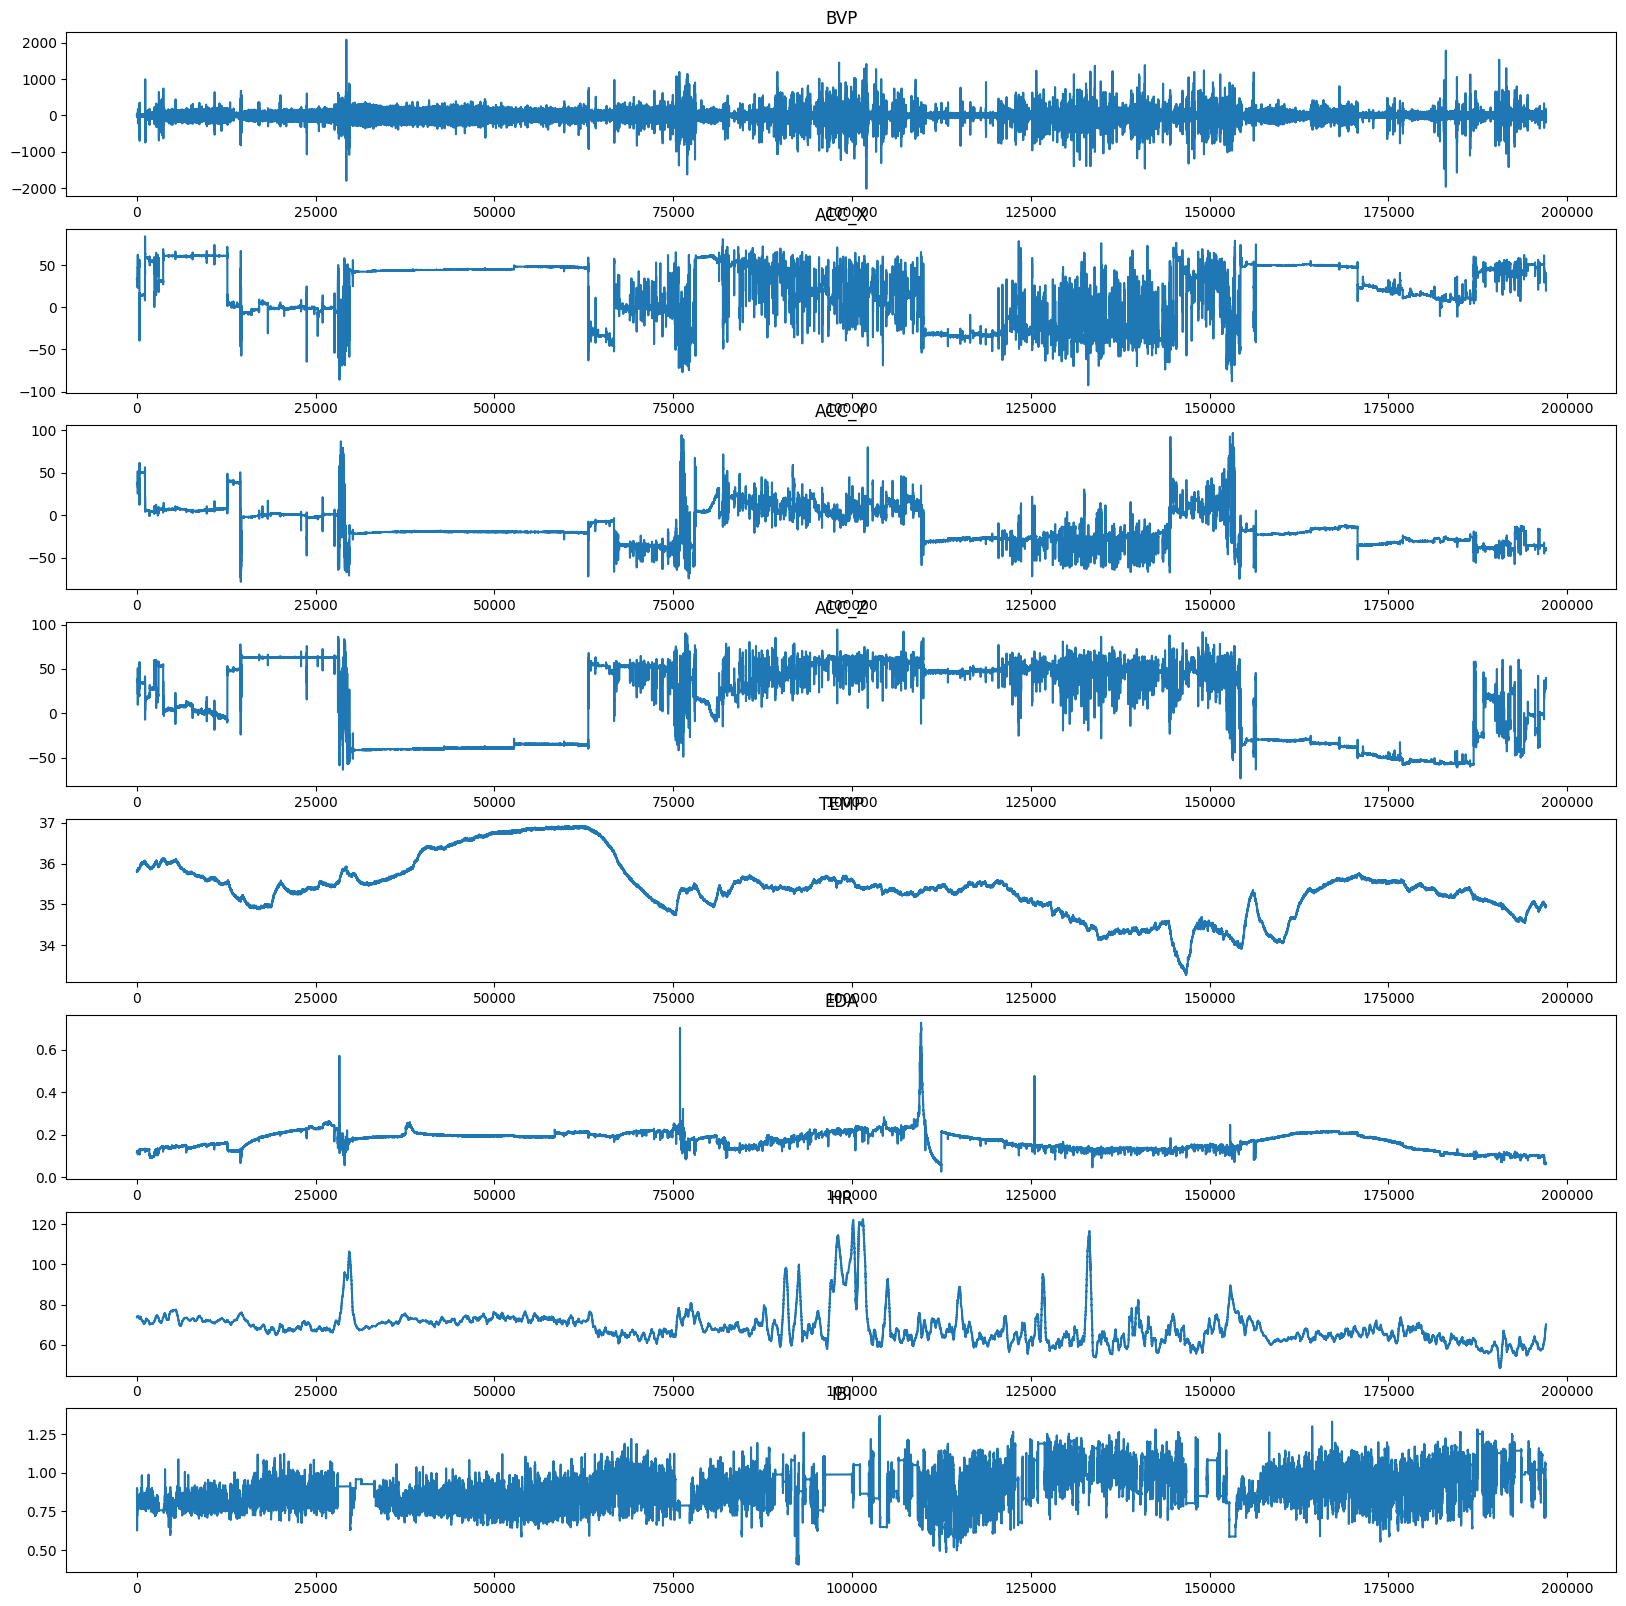

In [ ]:
fig , axes = plt.subplots(8 , 1 , figsize = (20 , 20))

for idx , col in enumerate (sample_train.drop(columns = ['Sleep_Stage']).columns) :

    axes[idx].plot(sample_train[col])
    axes[idx].set_title(col)

plt.show()

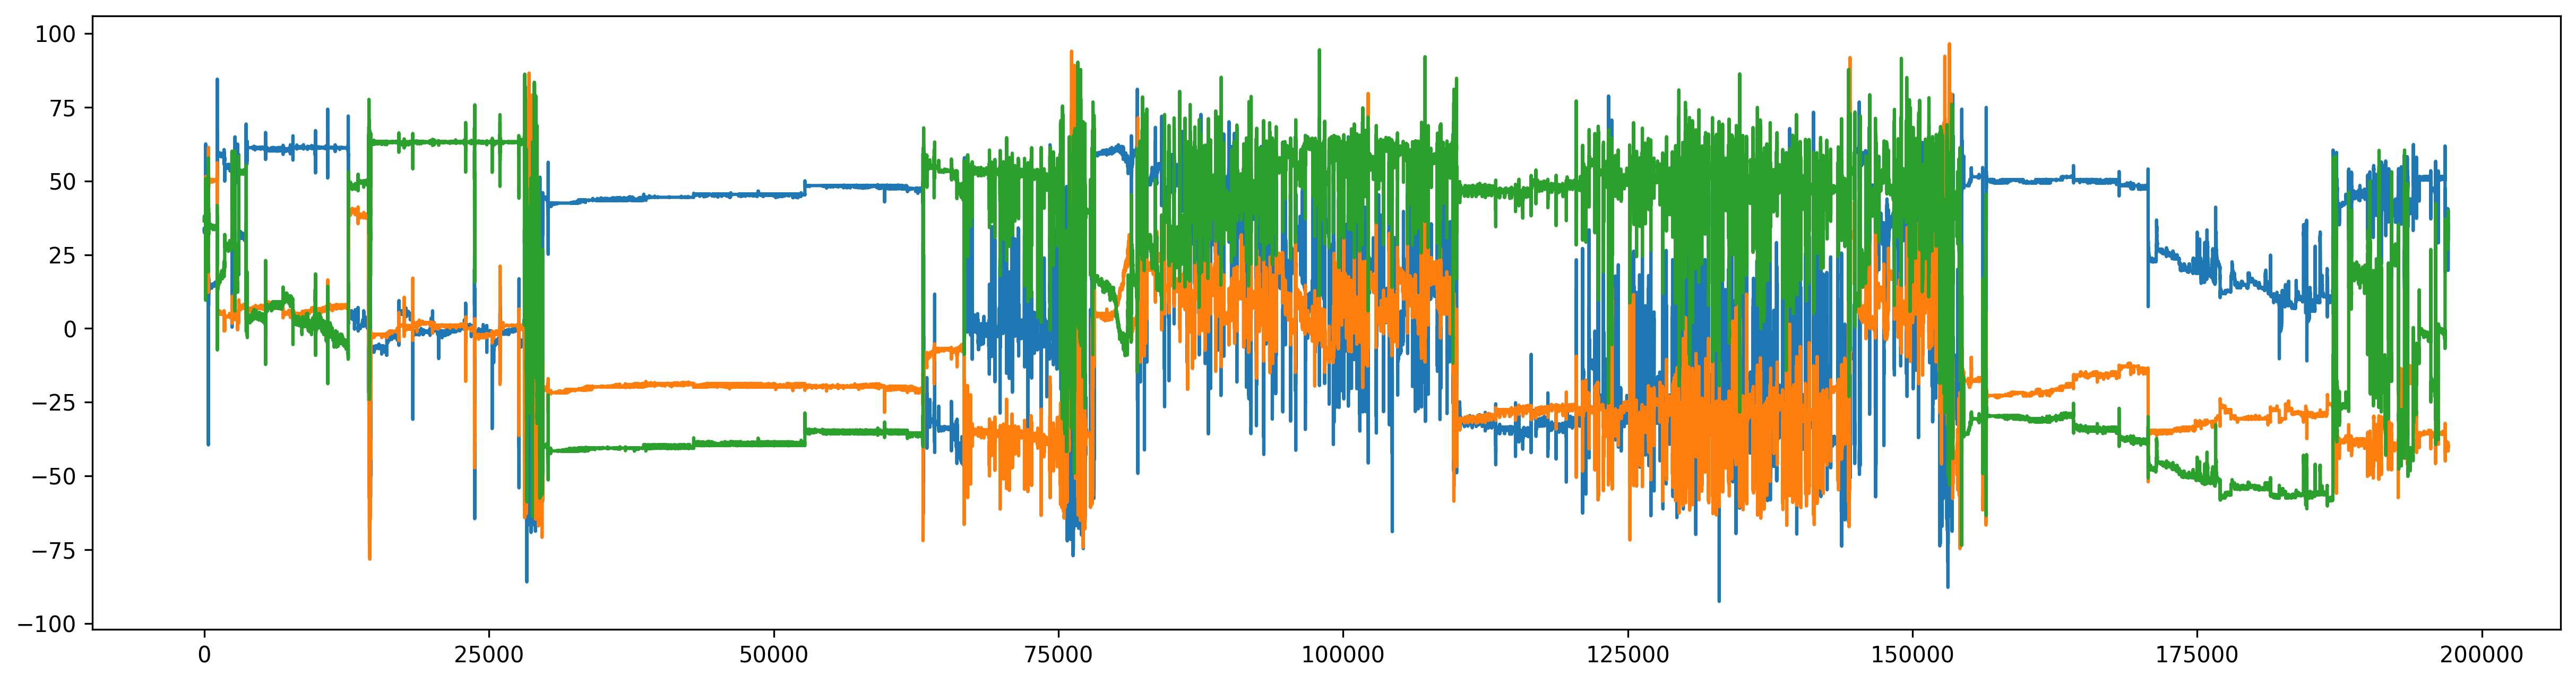

In [ ]:
figure(figsize=(20 , 5), dpi=300)

for idx , col in enumerate (sample_train.columns[1 : 4]) :

    plt.plot(sample_train[col])

plt.show()

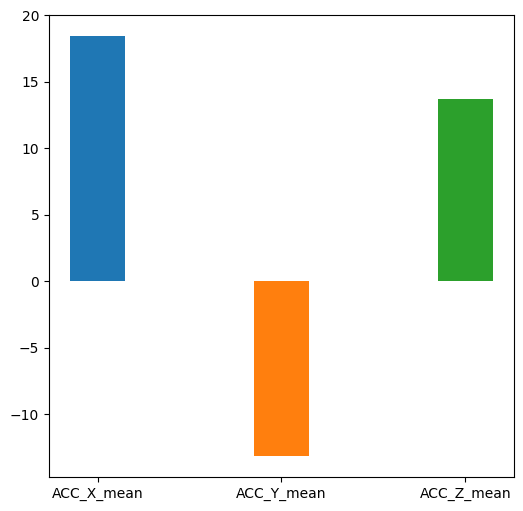

In [ ]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):

    plt.bar(f'{col}_mean' , sample_train[col].mean() ,  width=0.3)

plt.show()

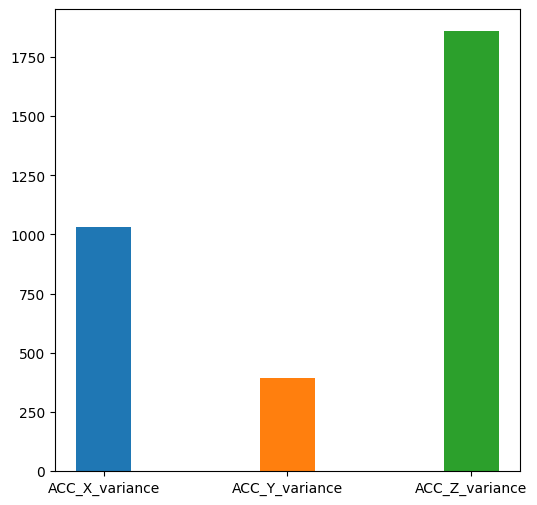

In [ ]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):

    plt.bar(f'{col}_variance' , sample_train[col].var() ,  width=0.3)

plt.show()

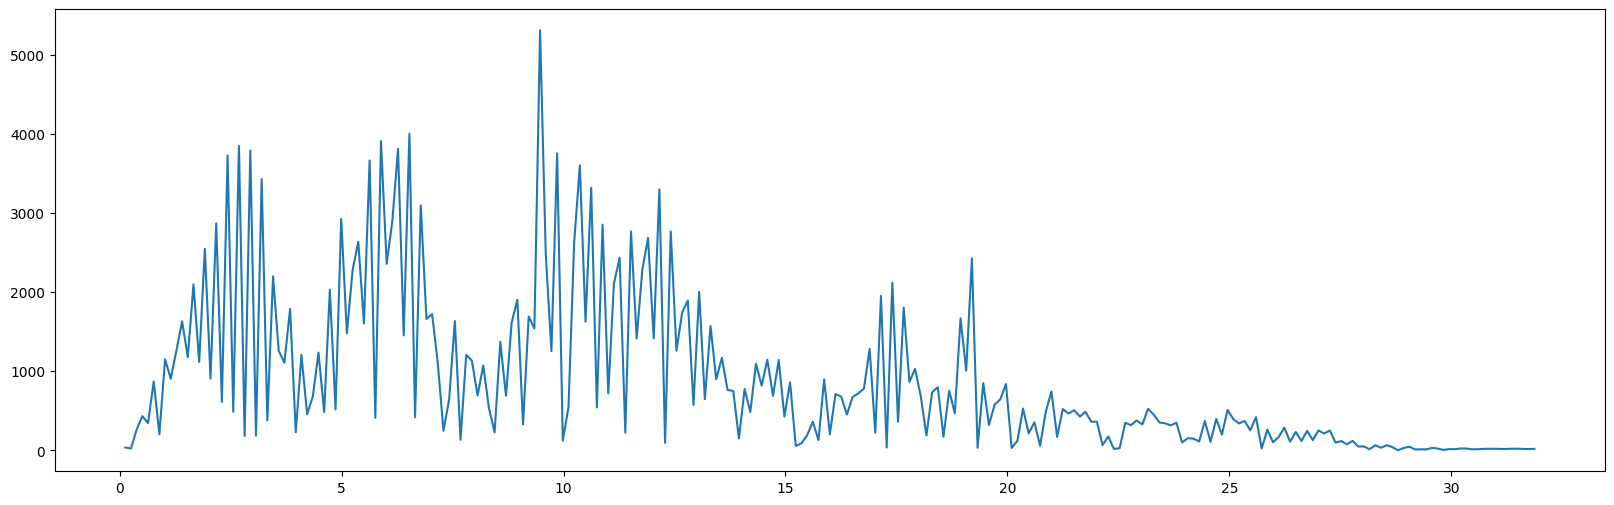

In [ ]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[ : 1]) :

    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 64

    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

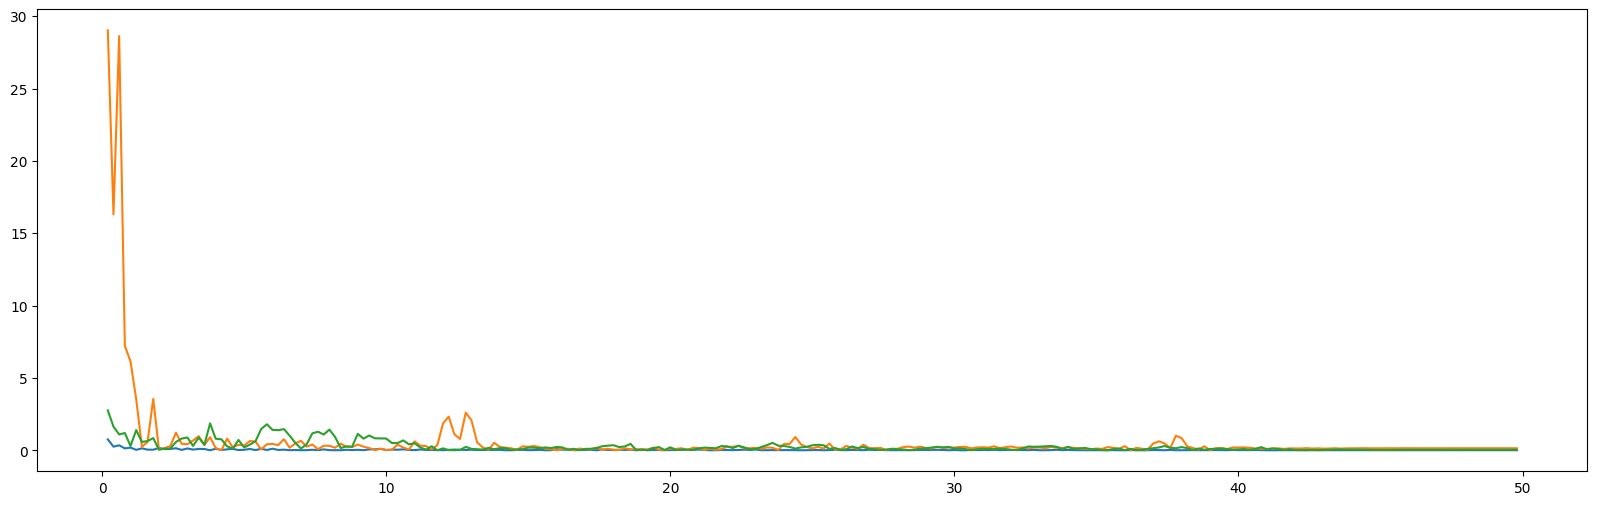

In [ ]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[5 : 8]) :

    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 100

    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

### Cutting 30 Seconds (1920 Rows)

In [ ]:
import glob
from tqdm.notebook import tqdm

In [ ]:
idx = 0

for file_path in tqdm(sorted(glob.glob('./datasets/train/*'))) :

    df = pd.read_csv(file_path)

    for i in range(0 , len(df) , 1920) :

        label = df.iloc[i]['Sleep_Stage']

        cropped_df = df.iloc[i : i + 1920]
        cropped_df.to_csv(f'./database/{label}/{idx}.csv' , index = False)

        idx += 1


0it [00:00, ?it/s]

### All Classes

In [ ]:
import glob
import os
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt

IsADirectoryError: [Errno 21] Is a directory: '/content/train'

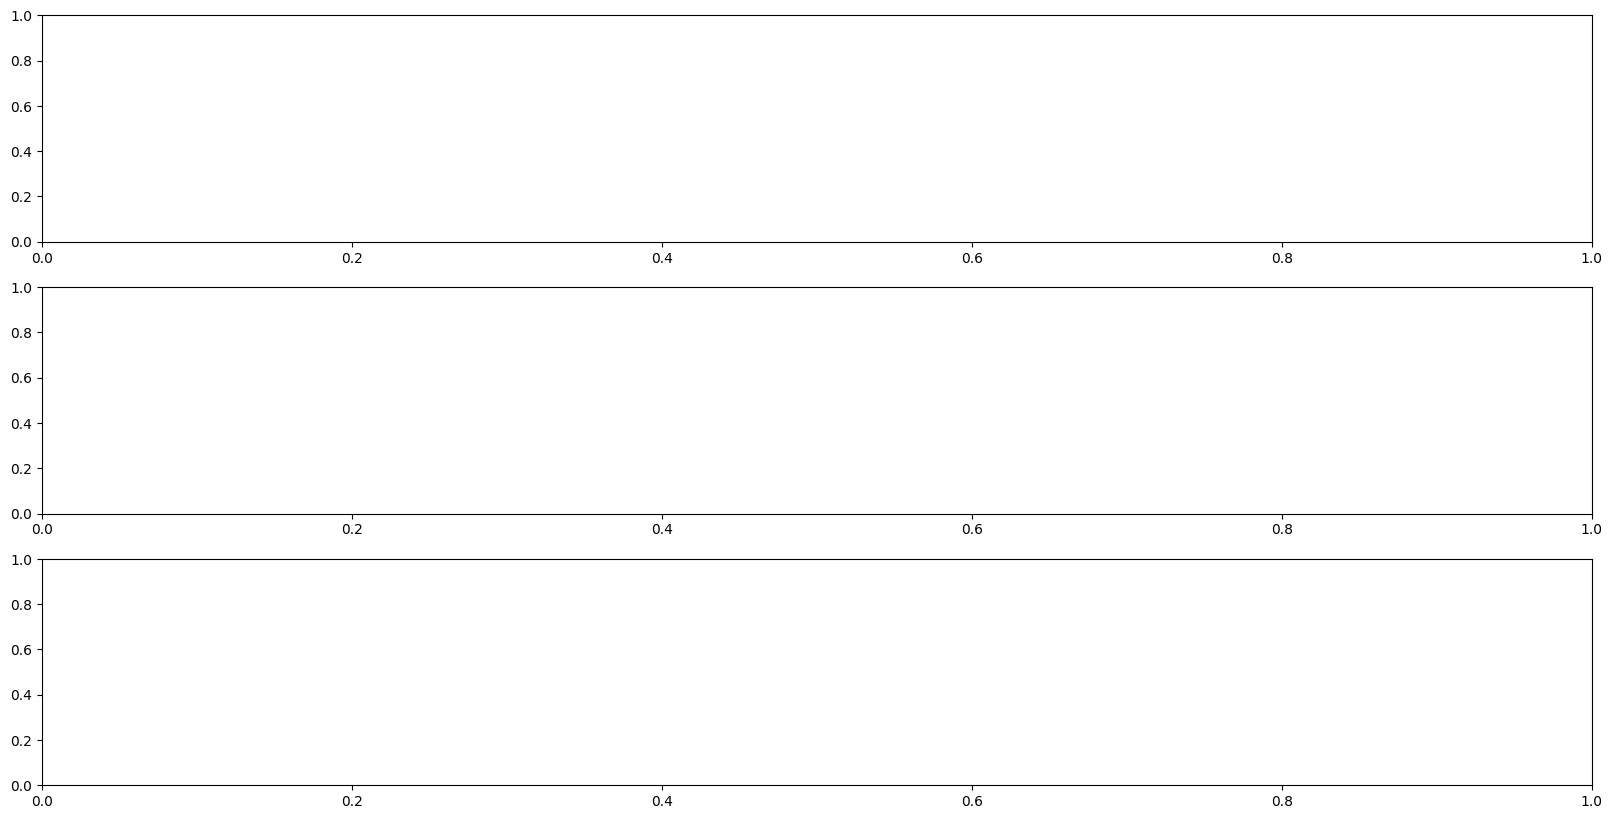

In [ ]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('/content/train')) :

    file = glob.glob(f'/content/train')[0]

    df = pd.read_csv(file)

    for col in df.columns[0 : 1] :

        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

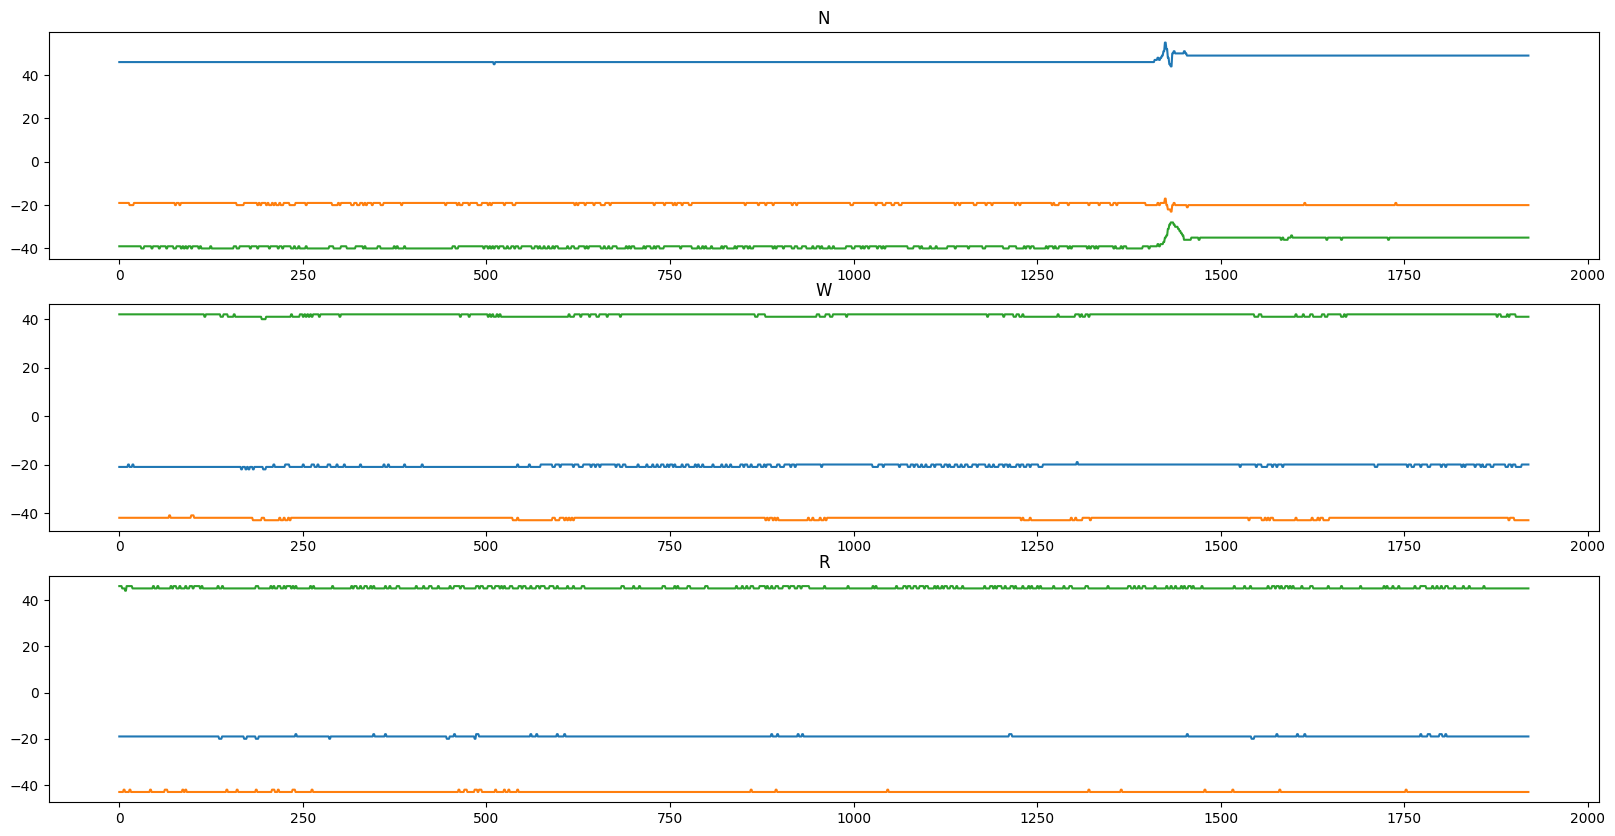

In [ ]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('./database')) :

    file = glob.glob(f'./database/{class_}/*')[0]

    df = pd.read_csv(file)

    for col in df.columns[1 : 4] :

        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

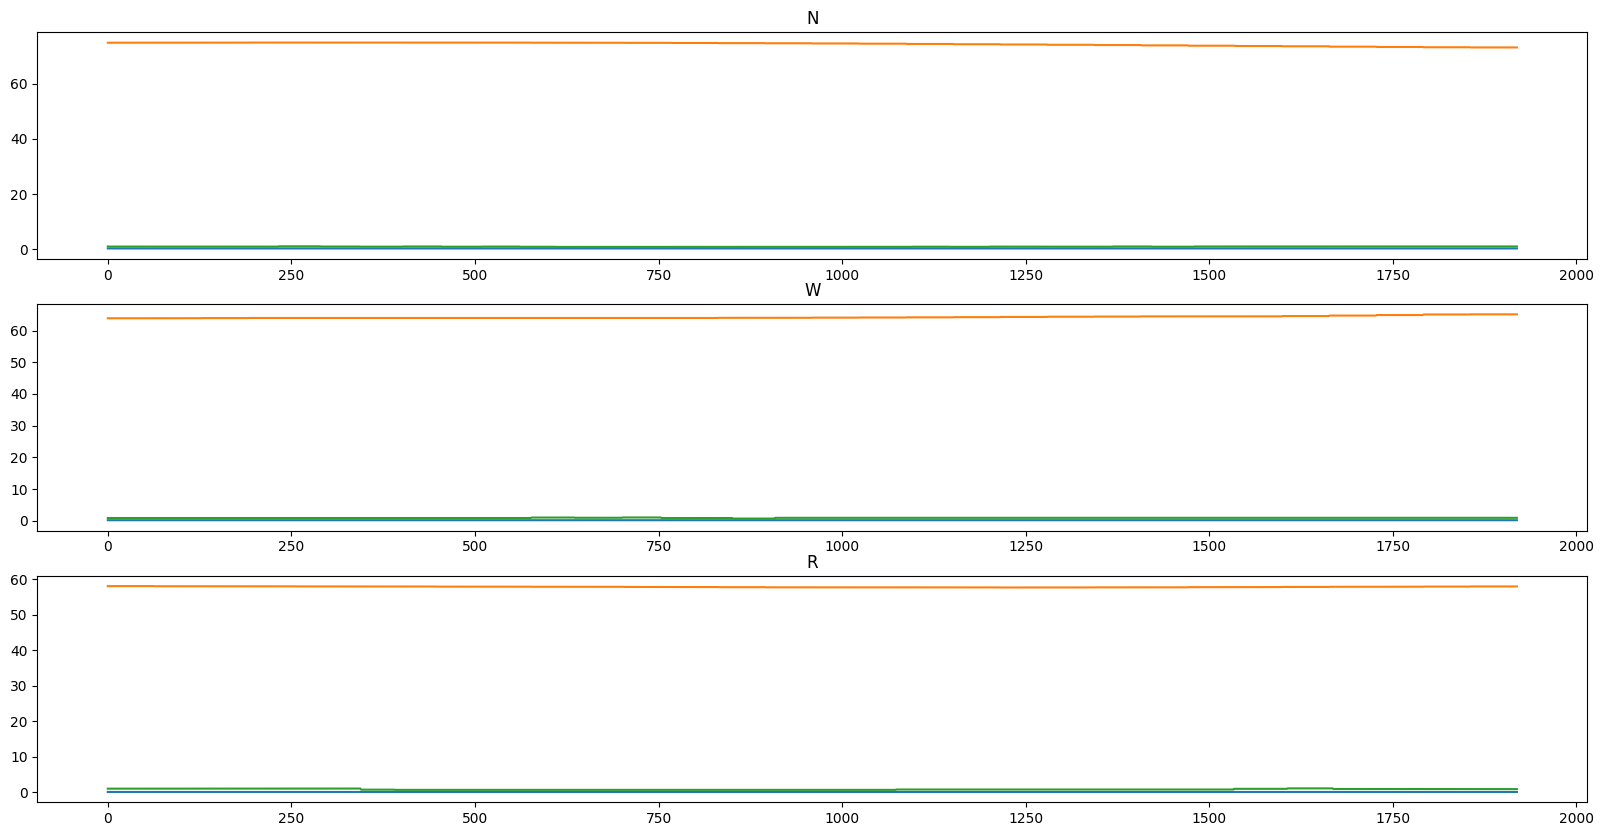

In [ ]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('./database')) :

    file = glob.glob(f'./database/{class_}/*')[0]

    df = pd.read_csv(file)

    for col in df.columns[5 : 8] :

        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

### Features Engineering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def raw_to_features(df , index) :

    freq = np.fft.fftfreq(1920) * 64

    start = 5
    divide = 2

    features = dict([])

    for idx , col in enumerate(df.columns) :

        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_std']  = df[col].std()
        features[f'{col}_var']  = df[col].var()

        features[f'{col}_fourier_mean'] = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).mean()
        features[f'{col}_fourier_std']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).std()
        features[f'{col}_fourier_var']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).var()

    result_df = pd.DataFrame(features, index = [index])

    return result_df

In [ ]:
sample_N_df = pd.read_csv('/content/train/train/train001.csv')

In [ ]:
sample_N_df

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,24.769553,-21.645915,-60.293260,4.985561,31.722536,0.064596,72.012622,1.050339,W
1,16.525415,-20.674261,-61.255688,5.212453,31.722926,0.064494,72.020963,1.050336,W
2,-0.236500,-21.138124,-60.701502,6.660493,31.722235,0.065237,72.008793,1.050339,W
3,1.726183,-21.705942,-60.486800,6.610589,31.723055,0.066115,72.020779,1.050337,W
4,4.377342,-21.271237,-60.607109,5.896132,31.722226,0.064433,72.010536,1.050337,W
...,...,...,...,...,...,...,...,...,...
178315,-28.132829,-32.604634,-23.806318,49.396453,34.965296,0.139064,77.236933,1.034892,W
178316,158.835229,-32.629647,-23.667879,49.395153,34.965613,0.140011,77.232193,1.034892,W
178317,93.841110,-32.620160,-23.756690,49.484914,34.964583,0.140641,77.239679,1.034892,W
178318,134.478264,-32.618614,-23.722392,49.345191,34.965779,0.140483,77.232610,1.034892,W


In [ ]:
sample_features_df = raw_to_features(sample_N_df.drop(columns = ['Sleep_Stage']) , 0)
sample_features_df['labels'] = sample_N_df['Sleep_Stage']
sample_features_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,-0.000058,100.341194,10068.355194,30251.029862,29670.775362,8.803549e+08,-3.901292,23.582913,556.153806,1760.195636,...,175.941793,3280.241512,1.075998e+07,0.944133,0.105292,0.011086,9.643711,34.909789,1218.69334,W


In [ ]:
import glob
import pandas as pd
from tqdm.notebook import tqdm

lst = []

# Use glob to get all CSV files within the directory
for file_path in tqdm(sorted(glob.glob('/content/train/train/*/*.csv'))) :
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df.drop(columns = ['Sleep_Stage']) , 0)
    features_df['labels'] = df['Sleep_Stage']

    lst.append(features_df)

train_df = pd.concat(lst)
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'

0it [00:00, ?it/s]

ValueError: No objects to concatenate

In [ ]:
lst = []

for file_path in tqdm(sorted(glob.glob('/content/train/train'))) :

    df = pd.read_csv(file_path)
    features_df = raw_to_features(df.drop(columns = ['Sleep_Stage']) , 0)
    features_df['labels'] = df['Sleep_Stage']

    lst.append(features_df)

train_df = pd.concat(lst)
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'

  0%|          | 0/1 [00:00<?, ?it/s]

IsADirectoryError: [Errno 21] Is a directory: '/content/train/train'

In [ ]:
import glob
import pandas as pd
from tqdm.notebook import tqdm

lst = []

# Use glob to get all CSV files within the directory, corrected the glob pattern.
for file_path in tqdm(sorted(glob.glob('/content/train/train/*.csv'))) :  # Changed glob pattern
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df.drop(columns = ['Sleep_Stage']) , 0)
    features_df['labels'] = df['Sleep_Stage']

    lst.append(features_df)

train_df = pd.concat(lst)
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'

  0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
train_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
id,,,,,,,,,,,,,,,,,,,,,
0,-0.000058,100.341194,10068.355194,30251.029862,29670.775362,8.803549e+08,-3.901292,23.582913,556.153806,1760.195636,...,175.941793,3280.241512,1.075998e+07,0.944133,0.105292,0.011086,9.643711,34.909789,1218.693340,W
1,0.000710,41.592505,1729.936436,13262.117260,12973.818575,1.683200e+08,-26.973489,19.220512,369.428075,1081.592483,...,97.926933,1804.169319,3.255027e+06,0.895096,0.099335,0.009867,16.305008,37.858207,1433.243816,W
2,-0.000094,71.074972,5051.651649,21933.059533,23077.039529,5.325498e+08,-2.663038,36.979829,1367.507754,2071.412741,...,138.386948,1972.379191,3.890280e+06,0.731308,0.077768,0.006048,9.018048,28.109917,790.167419,W
3,0.000108,34.117280,1163.988783,9723.394224,10499.285118,1.102350e+08,-54.626893,8.935093,79.835879,901.403811,...,110.529567,1689.981235,2.856037e+06,0.813103,0.064450,0.004154,8.003074,20.632872,425.715425,W
4,-0.000241,51.027052,2603.759993,14264.922486,17981.327622,3.233281e+08,-39.515507,30.845312,951.433281,1203.112158,...,104.422680,1840.330163,3.386815e+06,1.083644,0.108666,0.011808,15.931388,42.634341,1817.687020,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.000833,95.117794,9047.394658,19978.888370,36786.204568,1.353225e+09,7.282274,27.497802,756.129095,1033.046258,...,74.103050,1368.449591,1.872654e+06,0.961616,0.058348,0.003405,7.834689,21.430160,459.251755,W
79,0.000473,62.596620,3918.336888,19857.345675,18494.727821,3.420550e+08,-19.856542,13.719073,188.212957,1468.083861,...,161.077869,3071.170761,9.432090e+06,1.094094,0.126815,0.016082,13.294961,46.070868,2122.524856,W
80,0.000006,4.686084,21.959386,1561.111933,1345.715733,1.810951e+06,13.988175,30.049883,902.995450,1114.579404,...,172.219861,3786.326661,1.433627e+07,0.724807,0.114804,0.013180,13.373760,41.674330,1736.749757,W


In [ ]:
lst = []

for file_path in tqdm(sorted(glob.glob('/content/test_segment/test_segment'))) :

    df = pd.read_csv(file_path)
    features_df = raw_to_features(df , 0)

    lst.append(features_df)

test_df = pd.concat(lst)

  0%|          | 0/1 [00:00<?, ?it/s]

IsADirectoryError: [Errno 21] Is a directory: '/content/test_segment/test_segment'

In [ ]:
lst = []
for file_path in tqdm(sorted(glob.glob('/content/test_segment/test_segment/**/*.csv', recursive=True))) :
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df , 0)

    lst.append(features_df)

test_df = pd.concat(lst)

  0%|          | 0/7970 [00:00<?, ?it/s]

In [ ]:
index = [ file_path.split('/')[-1].split('.')[0] for file_path in sorted(glob.glob('./content/test_segment/test_segment/**/*.csv'))]
test_df.index = pd.Series(index)
test_df.index.name = 'id'
test_df

ValueError: Length mismatch: Expected axis has 7970 elements, new values have 0 elements

In [ ]:
index = [file_path.split('/')[-1].split('.')[0] for file_path in sorted(glob.glob('/content/test_segment/test_segment/**/*.csv', recursive=True))]

# Ensure index is not empty
if not index:
    raise ValueError("No CSV files found. Check the glob pattern and directory structure.")

test_df.index = pd.Series(index)
test_df.index.name = 'id'
test_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_var,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var
id,,,,,,,,,,,,,,,,,,,,,
test001_00000,-1.154843,125.240820,15685.263094,971.740291,1720.759676,2.961014e+06,-4.915503,0.103022,0.010614,1.286219,...,0.587860,2.941312,3.087973,9.535575,0.853461,3.279120e-02,1.075263e-03,1.924383e-01,3.076894e-01,9.467275e-02
test001_00001,1.432403,131.592821,17316.670459,877.181457,1881.986390,3.541873e+06,-4.907540,0.091498,0.008372,1.034465,...,0.016969,0.190528,0.211528,0.044744,0.907995,2.447300e-02,5.989278e-04,1.284546e-01,1.750947e-01,3.065817e-02
test001_00002,-0.139311,125.357462,15714.493394,1086.866551,1654.121265,2.736117e+06,-4.845913,0.177077,0.031356,2.166063,...,0.168869,0.590381,0.599233,0.359080,0.893860,6.822930e-02,4.655238e-03,1.590900e-01,2.333328e-01,5.444419e-02
test001_00003,0.280918,125.870373,15843.350679,683.593759,1865.969305,3.481841e+06,-4.791968,0.175948,0.030958,1.986641,...,0.025891,0.516138,0.532954,0.284040,0.923469,2.388414e-02,5.704523e-04,9.074716e-02,1.604810e-01,2.575415e-02
test001_00004,-0.327811,126.661255,16043.073590,896.169082,1787.364878,3.194673e+06,-4.801322,0.170599,0.029104,1.917673,...,0.196881,1.595978,1.647173,2.713179,0.904470,3.588715e-02,1.287887e-03,1.123847e-01,1.580494e-01,2.497961e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test010_00857,-0.036216,11.143724,124.182589,132.666195,115.300102,1.329411e+04,44.667600,0.210656,0.044376,2.571267,...,0.135966,1.799059,1.858216,3.452968,0.648738,5.815701e-08,3.382238e-15,7.392402e-07,5.386041e-07,2.900944e-13
test010_00858,0.087965,18.195445,331.074201,221.568085,182.812259,3.342032e+04,44.846335,0.278060,0.077318,3.126266,...,0.243668,1.045080,1.025046,1.050720,0.551331,5.053336e-02,2.553620e-03,1.750589e-01,2.150632e-01,4.625217e-02
test010_00859,0.015822,14.869193,221.092905,185.960132,143.259599,2.052331e+04,44.829686,0.244924,0.059988,3.043744,...,12.519287,11.552613,11.656878,135.882799,0.525169,2.336341e-15,5.458488e-30,1.544658e-17,1.649244e-16,2.720004e-32


In [ ]:
train_df.to_csv('/content/train_df.csv')
test_df.to_csv('/content/test_df.csv')

## Model Training & Inference

In [ ]:
!pip -q install -U pip
!pip -q install -U setuptools wheel
!pip -q install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
label = 'labels'

In [ ]:
hyperparameters = {
    'GBM': {'use_gpu': True},  # LightGBM
    'CAT': {'task_type': 'GPU'},  # CatBoost
    'NN_TORCH': {'use_gpu': True},  # Neural Network
    # Add other models as needed
}

In [ ]:
predictor = TabularPredictor(label = label , eval_metric = 'f1_weighted').fit(train_df , ag_args_fit={'num_gpus': 1} , hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20250221_141441"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   197.49 GB / 235.68 GB (83.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions

In [ ]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_FULL ...
	Training LightGBM_FULL with GPU, note that this may negatively impact model quality compared to CPU training.
	0.28s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: CatBoost_FULL ...
	228.02s	 = Training   runtime
Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
	Ensemble Weights: {'LightGBM': 1.0}
	0.12s	 = Training   runtime
Updated best model to "WeightedEnsemble_L2_FULL" (Previously "WeightedEnsemble_L2"). AutoGluon will

{'LightGBM': 'LightGBM_FULL',
 'CatBoost': 'CatBoost_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [ ]:
predictor.fit_pseudolabel(test_df)

Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 7970 rows of data on iteration 1. Adding to train data
Fitting 3 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_PSEUDO_1 ...
	1.0	 = Validation score   (f1_weighted)
	1.52s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: CatBoost_PSEUDO_1 ...
	1.0	 = Validation score   (f1_weighted)
	288.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch_PSEUDO_1 ...
		EmbedNet._set_params() got an unexpected keyword argument 'use_gpu'
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
            ^^^^^^^^^^^

In [ ]:
prediction = predictor.predict(test_df)

In [ ]:
prediction

,labels
id,
test001_00000,W
test001_00001,W
test001_00002,W
test001_00003,W
test001_00004,W
...,...
test010_00857,W
test010_00858,W
test010_00859,W


In [ ]:
features_importance = predictor.feature_importance(train_df)
features_importance

Computing feature importance via permutation shuffling for 48 features using 83 rows with 5 shuffle sets...
	6.74s	= Expected runtime (1.35s per shuffle set)
	0.85s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
BVP_mean,0.0,0.0,0.5,5,0.0,0.0
BVP_std,0.0,0.0,0.5,5,0.0,0.0
BVP_var,0.0,0.0,0.5,5,0.0,0.0
BVP_fourier_mean,0.0,0.0,0.5,5,0.0,0.0
BVP_fourier_std,0.0,0.0,0.5,5,0.0,0.0
BVP_fourier_var,0.0,0.0,0.5,5,0.0,0.0
ACC_X_mean,0.0,0.0,0.5,5,0.0,0.0
ACC_X_std,0.0,0.0,0.5,5,0.0,0.0
ACC_X_var,0.0,0.0,0.5,5,0.0,0.0
ACC_X_fourier_mean,0.0,0.0,0.5,5,0.0,0.0


In [ ]:
prediction.value_counts()

,count
labels,
W,7970


In [ ]:
submission_path = './submissions'
prediction.to_csv(f'{submission_path}/submission.csv')

### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pred = predictor.predict(train_df)
label = train_df['labels']

In [ ]:
pred.value_counts()

labels
N    43610
W    15862
R     7135
Name: count, dtype: int64

In [ ]:
label.value_counts()

labels
N    43607
W    15865
R     7135
Name: count, dtype: int64

In [ ]:
confusion_matrix = confusion_matrix(pred , label)

In [ ]:
confusion_matrix

array([[43607,     0,     3],
       [    0,  7135,     0],
       [    0,     0, 15862]])

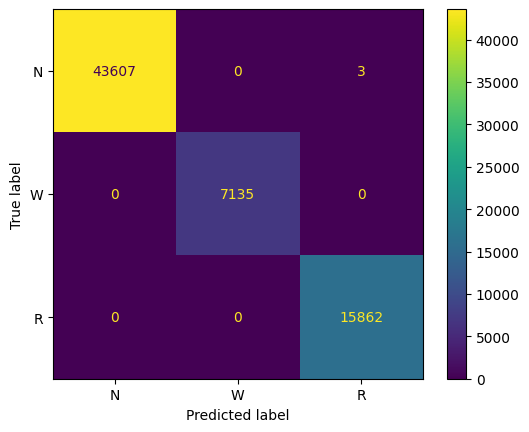

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = os.listdir('./database/'))
display.plot()

plt.show()